In [142]:
import numpy as np
def MapOverlap( a, b):
    Intersect = np.logical_and(a, b)
    Union=np.logical_or(a, b)
    return np.count_nonzero(Intersect)/np.count_nonzero(Union)

In [143]:
def MapHierach( a, b):
    I = np.count_nonzero(np.logical_and(a, b))
    A=np.count_nonzero(a)
    B=np.count_nonzero(b)
    return I/min([A,B])

In [144]:
from scipy.stats import entropy
def KL(a,b):
    return (entropy(a,b)+entropy(b,a))/2

In [145]:
from sklearn import metrics
def LayerOverlap(A,B):
    D=[]
    for i,a in enumerate(A):
        D.append([])
        print(i)
        for j,b in enumerate(B):
#             score=metrics.mutual_info_score(a,b)
            score=MapHierach(a,b)
#             score=KL(a,b)
            D[i].append(score)
    return D

In [146]:

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from pylab import figure
import os

def save_maps(components_img,dir):        
    if not os.path.exists(dir):
        os.makedirs(dir)
    components_img = masker.inverse_transform(components_img)
    for i, cur_img in enumerate(iter_img(components_img)):
        outname=dir+str(i)+'.png'
        plot_stat_map(cur_img, display_mode="z", title="ICN %d" % i,
                      cut_coords=1, colorbar=False,output_file=outname)

save_maps(maps_GLM,dir='/home/share/TmpData/Qinglin/HCP_Group_DBN/MOTOR_GLM/')        


In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def plot(D,file):
    plt.figure(figsize=(15,3))
    sns_plot=sns.heatmap(D,cmap="Reds")
    plt.savefig(file, bbox_inches='tight')
  

In [158]:
from nilearn.datasets import load_mni152_brain_mask
from nilearn import image
from nilearn.input_data import NiftiMasker

mask_img = load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mask_img,standardize=True)
masker.fit()

def flip(row):
    if np.sum(row > 0) < np.sum(row < 0):
        row *= -1
        
def load_maps(file):
    GLM=image.load_img(file)
    maps_GLM=masker.transform(GLM)
    maps_GLM[maps_GLM<0]=0
#     for row in maps_GLM:
#         flip(row)
    return maps_GLM

 

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


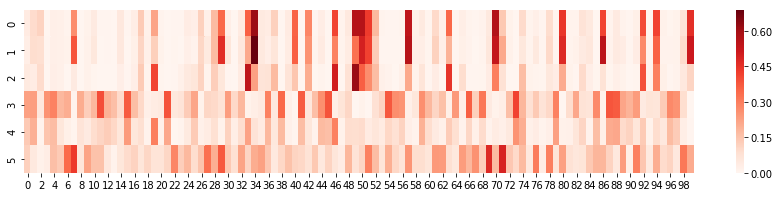

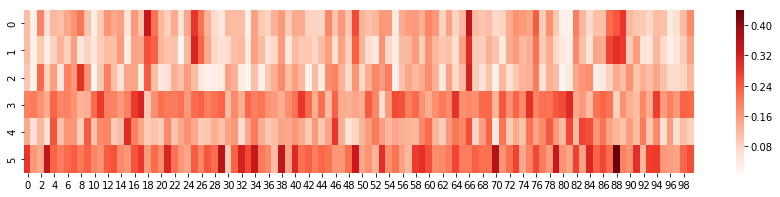

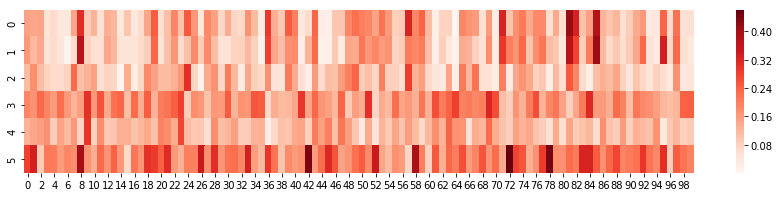

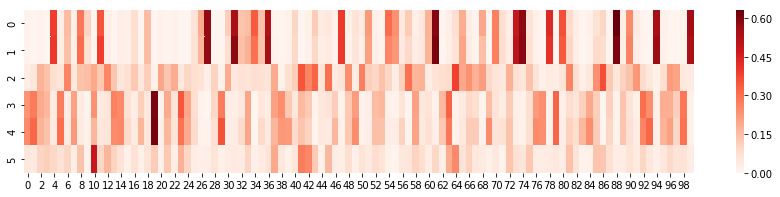

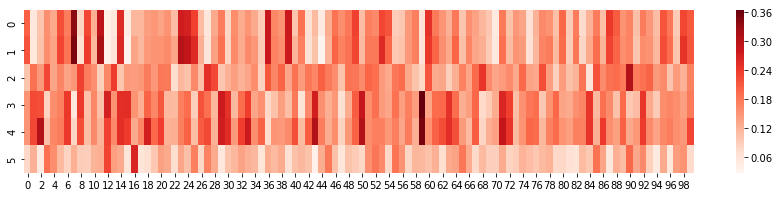

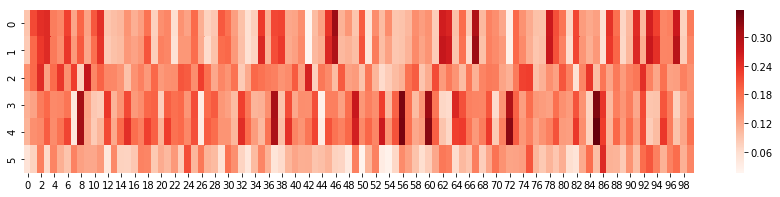

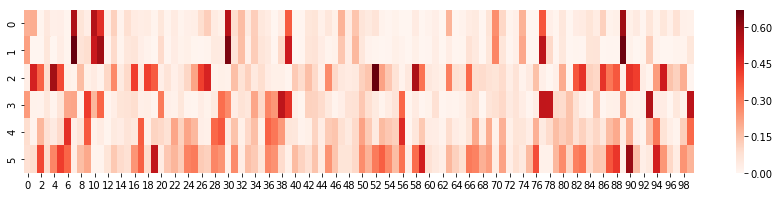

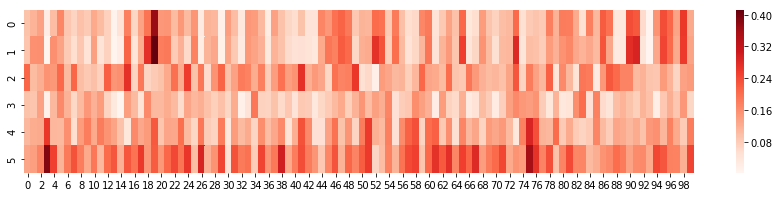

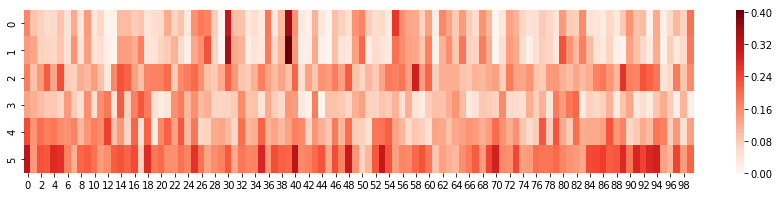

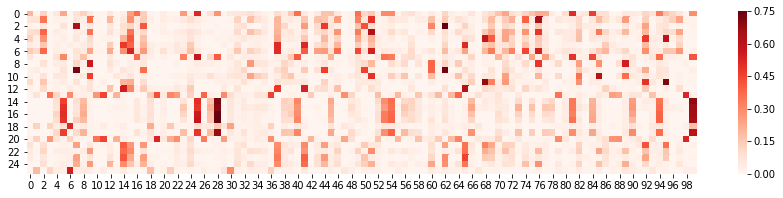

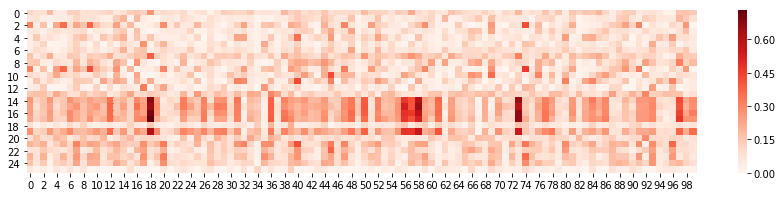

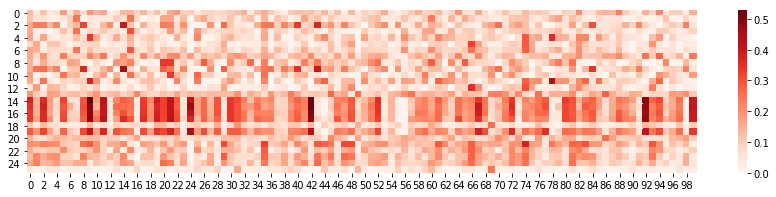

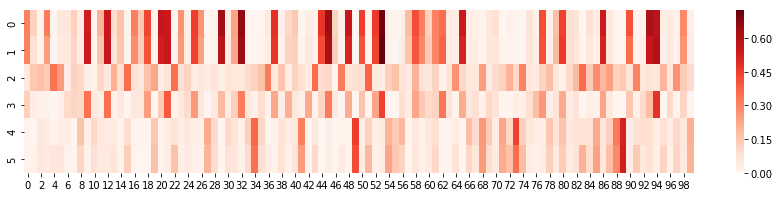

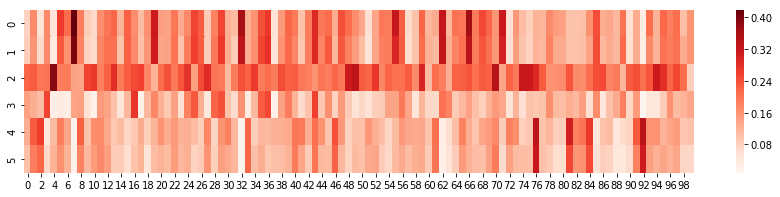

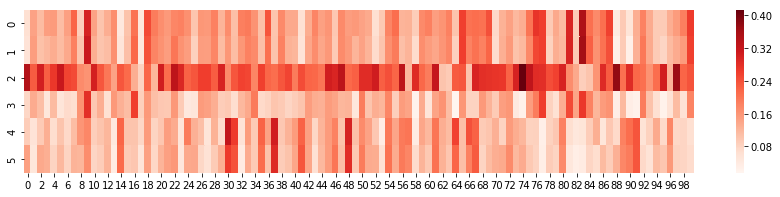

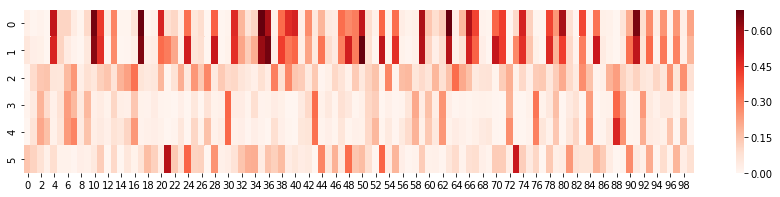

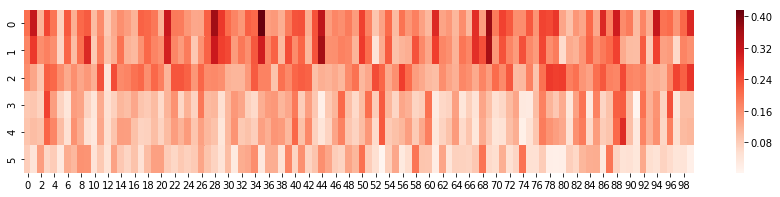

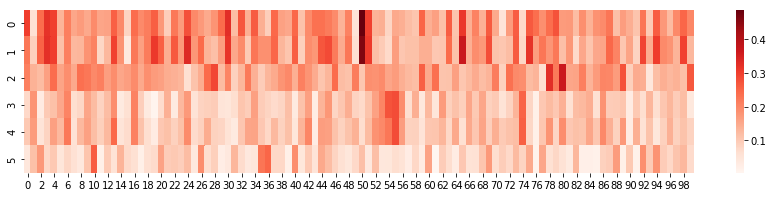

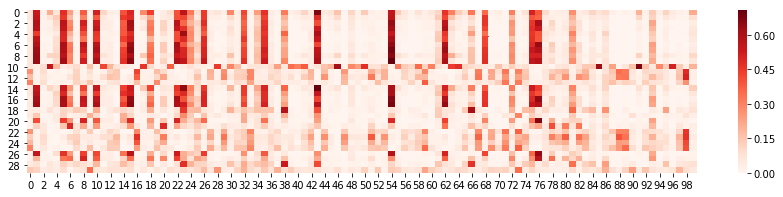

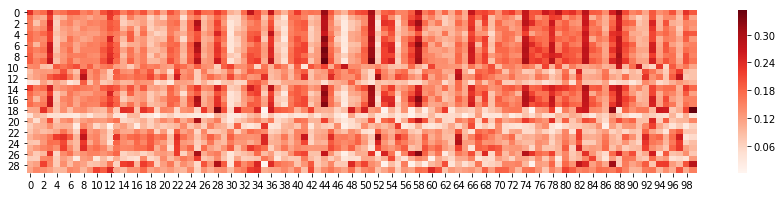

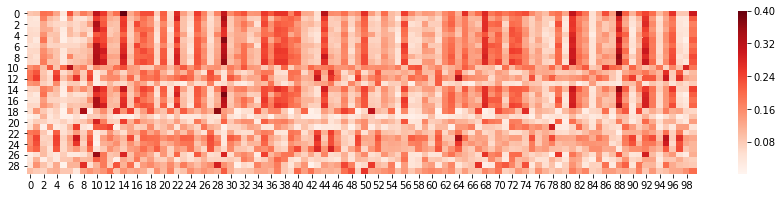

In [160]:
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for task in tasks:
    map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map1.npy')
    map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map2.npy')
    map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map3.npy')
    maps_GLM=load_maps('/home/share/TmpData/Qinglin/HCP_4mm_GLM/'+task+'/IC1_high.nii.gz')
    D1=LayerOverlap(maps_GLM,map1)
    D2=LayerOverlap(maps_GLM,map2)
    D3=LayerOverlap(maps_GLM,map3)
    plot(D1,'/home/share/TmpData/Qinglin/HCP_Group_DBN/GLM/'+task+'_D1.png')
    plot(D2,'/home/share/TmpData/Qinglin/HCP_Group_DBN/GLM/'+task+'_D2.png')
    plot(D3,'/home/share/TmpData/Qinglin/HCP_Group_DBN/GLM/'+task+'_D3.png')

In [156]:
np.allclose(maps_GLM[0],maps_GLM[1])

False

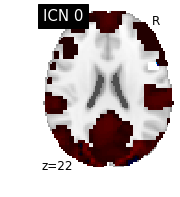

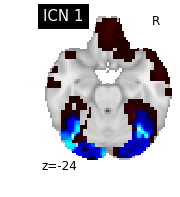

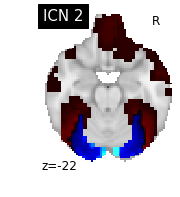

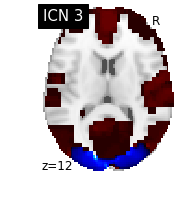

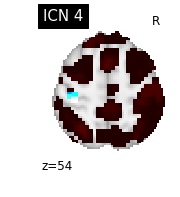

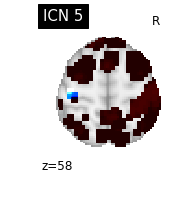

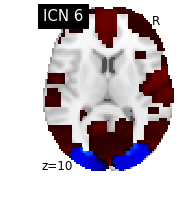

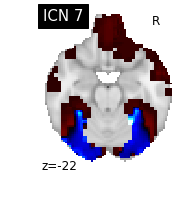

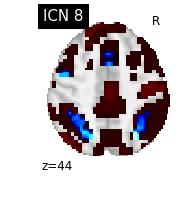

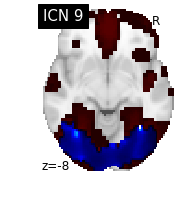

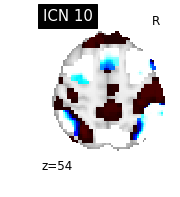

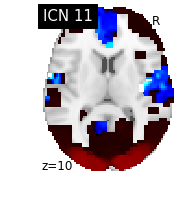

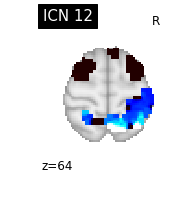

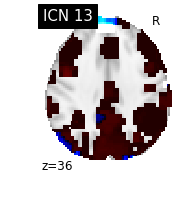

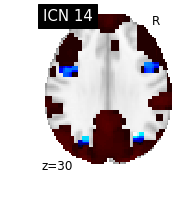

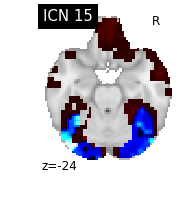

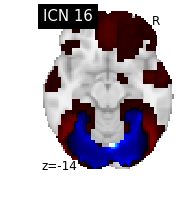

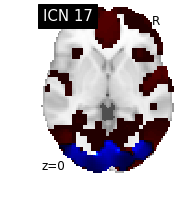

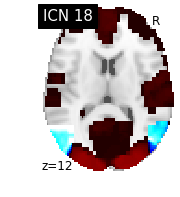

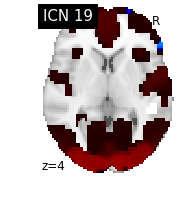

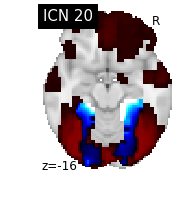

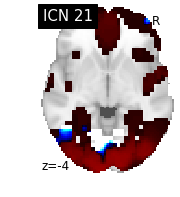

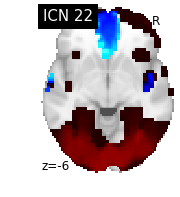

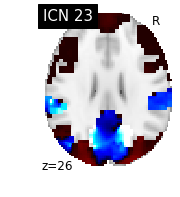

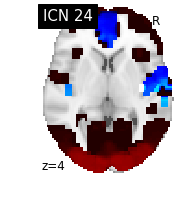

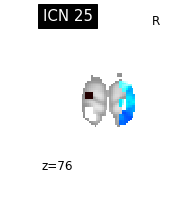

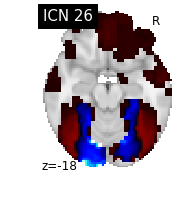

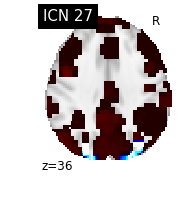

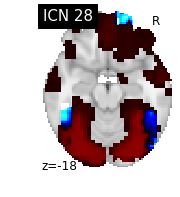

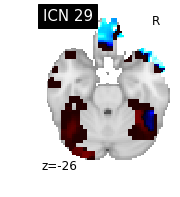

In [157]:
components_img = masker.inverse_transform(maps_GLM)
for i, cur_img in enumerate(iter_img(components_img)):

    plot_stat_map(cur_img, display_mode="z", title="ICN %d" % i,
                  cut_coords=1, colorbar=False)
